In [1]:
import numpy as np
from scipy.optimize import minimize



In [2]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [3]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)


In [4]:
cos = np.cos
sin = np.sin

In [5]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

In [6]:
def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

In [7]:
def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [8]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand
    

In [9]:
def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand
    

In [10]:
def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand
    

In [11]:


def f_classical(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_classical_prime(a, b, c, d, t):
    return  3*a*t**2 + 2*b*t + c

def f_classical_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


n_grid = 100
range_min = 0
range_max = 10
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

print(t_data)


print('=======')
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = params


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f_classical(a1, b1, c1, d1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f_classical(a2, b2, c2, d2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f_classical(a3, b3, c3, d3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f_classical(a1, b1, c1, d1, t_data[i])
        u2[i + 1] = f_classical(a2, b2, c2, d2, t_data[i])
        u3[i + 1] = f_classical(a3, b3, c3, d3, t_data[i])


    u1[n_grid + 1]=f_classical(a1, b1, c1, d1, range_max + dt)  
    u2[n_grid + 1]=f_classical(a2, b2, c2, d2, range_max + dt)  
    u3[n_grid + 1]=f_classical(a3, b3, c3, d3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss



initial_params = [1, 2, 3,4,1,2,3,4,1,2,3,4]
# initial_params_f2 = [1, 2, 3,4]
# initial_params_f3 = [1, 2, 3,4]

# initial_params = [4, 4, 4,4]
# initial_params = [10, 20, 8,70]
# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = result.x


print("Optimized a:", a1)
print("Optimized b:", b1)
print("Optimized c:", c1)
print("Optimized d:", d1)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [12]:
# del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
# omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

# del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
# omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

# del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
# omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]

In [13]:
del1_target_values=[0.0626, 0.07011511700126488, 0.07781808464088463, 0.08528731252235024, 0.09252561232632919, 0.09953627253483219, 0.10632298558469415, 0.11288978592381416, 0.11924099550094004, 0.12538116092310436, 0.1313150214749864, 0.13704746128002537, 0.14258346593202448, 0.1479280980321741, 0.15308647180975246, 0.1580637231704054, 0.162864979448481, 0.16749535092036527, 0.17195992276795335, 0.17626372398609969, 0.18041172093460003, 0.18440880330416648, 0.18825978411642774, 0.19196939929507387, 0.19554228187986128, 0.19898296573960586, 0.20229588029414014, 0.20548535048126088, 0.20855559682179, 0.21151074046976706, 0.2143547838168953, 0.2170916139850914, 0.2197250100699584, 0.22225864314078608, 0.22469607624055052, 0.22704076402879042, 0.2292960674376365, 0.23146523256816745, 0.2335513914684538, 0.2355575804690473, 0.23748674018298058, 0.2393417155057674, 0.24112525561540263, 0.24284001373755157, 0.244488560938238, 0.24607339087230434, 0.24759687898979374, 0.2490613254879243, 0.2504689553110891, 0.2518219181508561, 0.25312228844596824, 0.25437206538234336, 0.2555731728930744, 0.2567274565279365, 0.2578367318859555, 0.25890272387293733, 0.25992707556876277, 0.2609113770204691, 0.26185716524225067, 0.26276592421545836, 0.2636390848885999, 0.26447802517733987, 0.2652840699644995, 0.2660584911000569, 0.26680250740114697, 0.26751729059635415, 0.2682040204583055, 0.2688637690148282, 0.2694975720362532, 0.27010643179502225, 0.2706913170656882, 0.2712531631249151, 0.2717928717514777, 0.272311311226262, 0.27280931633226513, 0.2732876883545949, 0.27374719508047035, 0.27418857079922165, 0.2746125101242157, 0.27501972051752316, 0.2754108805347162, 0.27578660364113317, 0.27614748446390364, 0.2764940987919484, 0.27682700357597934, 0.2771467369284995, 0.27745381812380304, 0.2777487475979754, 0.278032006948893, 0.2783040589362236, 0.27856534748142603, 0.2788162976677502, 0.2790573157402372, 0.2792887891057194, 0.27951108737321, 0.2797245928018323, 0.27992964027298156, 0.28012656335770103, 0.28031568295253395, 0.2804973072795233]
omega1_target_values=[1.0, 1.0002053744712585, 1.0001992040515397, 1.0001931005995672, 1.0001870775646282, 1.0001811464936181, 1.0001753170129084, 1.0001695977322709, 1.000163994917078, 1.0001585142393608, 1.00015316022813, 1.0001479358015117, 1.0001428435604998, 1.000137885066431, 1.0001330611039434, 1.0001283720239111, 1.0001238177119913, 1.000119397078641, 1.0001151093429679, 1.0001109527154783, 1.000106925821476, 1.0001030266044477, 1.0000992523260634, 1.0000956012128968, 1.0000920702602558, 1.0000886572139727, 1.00008535944865, 1.000082173958235, 1.0000790974204912, 1.000076127696918, 1.00007326140231, 1.000070495944901, 1.0000678285644389, 1.0000652563321863, 1.0000627761509207, 1.0000603849150695, 1.0000580805143373, 1.000055859776211, 1.0000537202207556, 1.0000516593242852, 1.0000496745193639, 1.0000477631948048, 1.0000459226956717, 1.0000441503393105, 1.0000424445256857, 1.0000408024621597, 1.000039222060177, 1.000037701246406, 1.000036237962736, 1.0000348301662811, 1.000033475829377, 1.000032172939582, 1.0000309194996782, 1.0000297137758816, 1.0000285543088978, 1.0000274391648023, 1.0000263667796738, 1.0000253356214222, 1.0000243441897885, 1.0000233910163452, 1.0000224746644957, 1.0000215937294745, 1.000020746838348, 1.000019932650013, 1.0000191498551978, 1.0000183976066614, 1.000017674527786, 1.0000169795221794, 1.0000163115535299, 1.0000156696132905, 1.0000150527206781, 1.000014459922675, 1.000013890294027, 1.0000133429372453, 1.0000128169826044, 1.0000123115881445, 1.00001182593967, 1.0000113592507491, 1.0000109108258814, 1.0000104800633605, 1.0000100661552194, 1.0000096684711834, 1.0000092863989134, 1.0000089193440056, 1.0000085667299905, 1.0000082279983349, 1.0000079026084394, 1.0000075900376413, 1.0000072897812118, 1.0000070013523572, 1.0000067242822201, 1.0000064581198773, 1.0000062024323406, 1.0000059568045578, 1.0000057208416973, 1.0000054942241603, 1.0000052765544856, 1.000005067476474, 1.0000048666521293, 1.0000046737616586]

del2_target_values=[1.0567, 1.045188644166267, 1.0330710054706214, 1.0210113213972747, 1.0090332602616154, 0.9971584766590975, 0.9854066503172662, 0.9737955751195456, 0.9623412024375818, 0.9510577451624997, 0.9399577659577769, 0.9290522363902008, 0.9183506455189581, 0.9078611045499141, 0.8975904395949054, 0.8875442041910119, 0.8777268657090043, 0.8681418599917079, 0.858791663095336, 0.8496778558459428, 0.840801183463983, 0.832161717736997, 0.8237588570196098, 0.815591383109577, 0.8076575728474491, 0.7999551376359946, 0.7924814305912657, 0.7852334470024374, 0.7782078214475316, 0.7714009038465837, 0.7648088256335095, 0.7584274227993835, 0.7522524111964097, 0.7462793865379225, 0.7405038243983861, 0.7349210740841562, 0.7295264429732695, 0.7243152029969568, 0.7192825349978819, 0.7144236459249871, 0.7097337688334933, 0.7052081628849, 0.7008421133469852, 0.6966309309337182, 0.6925699658688557, 0.6886546826121561, 0.6848805544187692, 0.6812431445201764, 0.677738106124192, 0.6743611824149621, 0.6711082065529649, 0.6679751016750112, 0.6649578808942436, 0.6620526453034479, 0.6592555798457682, 0.6565629864886825, 0.6539712669660425, 0.6514769190840918, 0.6490765367214666, 0.646766809829196, 0.6445445244307014, 0.6424065626217972, 0.6403499025706897, 0.6383716185179783, 0.636468880776655, 0.6346389434371852, 0.632879085319277, 0.6311867598515346, 0.6295594976170278, 0.6279949029167139, 0.6264906537694361, 0.6250445019119255, 0.6236542727987989, 0.6223178656025606, 0.6210332532136014, 0.6197984822401987, 0.6186116730085172, 0.6174710195626075, 0.6163748012240318, 0.6153212765223872, 0.6143087746209519, 0.6133357620533846, 0.6124007510315712, 0.6115022994456257, 0.6106390108638885, 0.6098095345329279, 0.6090125653775392, 0.6082468440007451, 0.6075111566837957, 0.6068043353861684, 0.6061252577455677, 0.6054728470779256, 0.6048460723774013, 0.6042439483163814, 0.6036655327940371, 0.603109854002736, 0.6025760533706005, 0.6020632782874432, 0.6015707078420839, 0.6010975528223498]
omega2_target_values=[1.0, 0.9996812436713708, 0.9996824368233903, 0.9996842784487356, 0.9996867149486116, 0.9996896938572059, 0.9996931648623041, 0.999697077882039, 0.9997013873880721, 0.9997060479332407, 0.9997110163949599, 0.9997162537974418, 0.9997217223283824, 0.9997273855022293, 0.9997332109895083, 0.9997391684484528, 0.9997452292572131, 0.9997513667885094, 0.9997575568380925, 0.999763778017076, 0.9997700097391491, 0.9997762336388972, 0.9997824335718024, 0.9997885938436536, 0.9997947022054877, 0.9998007459977208, 0.9998067144397513, 0.9998125986442775, 0.9998183914624751, 0.9998240843396944, 0.9998296726880795, 0.999835150565756, 0.9998405133609886, 0.9998457577921829, 0.9998508819078844, 0.9998558845413487, 0.9998607621230342, 0.9998655153031657, 0.9998701428142027, 0.9998746441546407, 0.99987901958901, 0.9998832701478777, 0.9998873976278456, 0.9998914045184975, 0.9998952889940841, 0.9998990551420898, 0.9999027042000487, 0.9999062377463274, 0.999909657700124, 0.9999129663214692, 0.9999161662112256, 0.9999192603110875, 0.9999222519035816, 0.9999251431627894, 0.9999279349670758, 0.999930631347703, 0.999933234506908, 0.9999357467434296, 0.9999381704525091, 0.9999405081258901, 0.9999427623518182, 0.9999449358150416, 0.9999470312968104, 0.9999490516748772, 0.9999509999234969, 0.999952875892428, 0.9999546833777068, 0.9999564246254994, 0.9999581016505338, 0.9999597164634283, 0.9999612710706909, 0.9999627674747203, 0.999964207673805, 0.9999655936621235, 0.9999669274297447, 0.9999682109626274, 0.9999694462426206, 0.9999706352474634, 0.9999717794121763, 0.9999728792452283, 0.9999739373454042, 0.999974955125786, 0.9999759339733575, 0.9999768752490046, 0.9999777802875146, 0.9999786503975773, 0.9999794868617832, 0.9999802909366254, 0.9999810638524985, 0.999981806813699, 0.999982520998425, 0.9999832075587766, 0.9999838676207554, 0.999984502284265, 0.9999851125893116, 0.9999856986486229, 0.9999862618212212, 0.999986803036109, 0.9999873231407037, 0.999987822900838]

del3_target_values=[0.9449, 0.9233097919293766, 0.9015941600961741, 0.8809449300929801, 0.8613211152265107, 0.8426809446472738, 0.8249823447176721, 0.808183311417506, 0.7922422287961758, 0.7771182078526278, 0.762771217952042, 0.7491623195217852, 0.7362538298554815, 0.7240093894575943, 0.712393991591014, 0.701374131325954, 0.6909177891355154, 0.6809944319614829, 0.6715749401629179, 0.6626317090608779, 0.6541385840829863, 0.6460707700002781, 0.6384048309271991, 0.6311185759401254, 0.6241910812019784, 0.6176026930846807, 0.6113348243075019, 0.6053699537608782, 0.5996916279365222, 0.5942842847938757, 0.5891333103689427, 0.5842250562857106, 0.5795466088275281, 0.5750857889371048, 0.5708311522165118, 0.5667719919656037, 0.5628981119591714, 0.5591999745600454, 0.5556686992992352, 0.5522958575553165, 0.5490734725544307, 0.5459940193702864, 0.5430504249241577, 0.5402360690055024, 0.5375446381763854, 0.5349701103754473, 0.5325069714583156, 0.5301499593453394, 0.5278940640215889, 0.525734527536856, 0.5236668440056537, 0.5216867596072162, 0.5197902725854994, 0.5179736312879412, 0.5162331134153934, 0.5145652965011241, 0.5129669864191772, 0.5114351200222264, 0.5099667651415755, 0.5085591205871591, 0.507209516147542, 0.5059154125899189, 0.5046744016601152, 0.5034842060825865, 0.5023426795604183, 0.5012477514505317, 0.5001973381425661, 0.49918960086856135, 0.4982227711116383, 0.49729514565494826, 0.4964050865816724, 0.4955510212750226, 0.4947314424182408, 0.49394490799459945, 0.49319004128740107, 0.49246553087997874, 0.4917701306556956, 0.4911026597979452, 0.4904620090199738, 0.4898470260884229, 0.48925662878301646, 0.4886898455429012, 0.4881457363942098, 0.48762339295006146, 0.48712193841056123, 0.4866405275628006, 0.4861783467808568, 0.48573461402579343, 0.48530857884566025, 0.48489952237549305, 0.48450675733731385, 0.4841296280401307, 0.4837675103799379, 0.4834198118397158, 0.48308596961157485, 0.48276539120772366, 0.4824575647208955, 0.4821619805328363, 0.4818781490796237, 0.4816056008516666]
omega3_target_values=[1.0, 0.9994153819800515, 0.9994439144548619, 0.99947138498868, 0.9994977667608494, 0.9995230458073683, 0.9995472199737331, 0.9995702936985236, 0.9995922837403288, 0.9996132104741642, 0.9996330991840697, 0.9996519819547705, 0.9996698904002386, 0.9996868629915544, 0.9997029369955647, 0.9997181493895573, 0.9997325380373921, 0.9997461467116603, 0.9997590103287375, 0.9997711690333667, 0.9997826564183131, 0.9997935092146351, 0.9998037672916854, 0.9998134585130574, 0.9998226183399741, 0.9998312742264673, 0.9998394545993428, 0.9998471889394853, 0.9998545072934587, 0.9998614286130719, 0.9998679797275244, 0.9998741804879541, 0.9998800508358443, 0.9998856108030243, 0.9998908805116689, 0.9998958791094255, 0.9999006182293404, 0.9999051158304734, 0.9999093847079507, 0.999913437476675, 0.9999172865713263, 0.9999209442463608, 0.9999244225760119, 0.9999277333577756, 0.9999308816823401, 0.999933879581994, 0.9999367345414052, 0.9999394538722869, 0.9999420447133966, 0.9999445140305362, 0.9999468686165522, 0.9999491150913359, 0.9999512599018225, 0.9999533079394319, 0.9999552627225269, 0.9999571303434196, 0.9999589148077467, 0.9999606200150091, 0.9999622497585731, 0.9999638077256696, 0.999965297497395, 0.9999667225487104, 0.9999680862484422, 0.9999693918592816, 0.9999706425377849, 0.9999718389663892, 0.9999729848895083, 0.9999740825815765, 0.9999751340816475, 0.9999761413730511, 0.9999771063833934, 0.9999780309845566, 0.9999789169926993, 0.999979766168256, 0.9999805802159379, 0.9999813607847319, 0.9999821094679012, 0.9999828278029856, 0.9999835169135983, 0.9999841773704008, 0.9999848110776461, 0.9999854190822689, 0.9999860024030935, 0.9999865620308351, 0.9999870989280973, 0.9999876140293752, 0.9999881082410522, 0.9999885824414029, 0.9999890374805911, 0.9999894741806706, 0.9999898933355852, 0.9999902957111686, 0.9999906820451442, 0.9999910530471254, 0.999991409378609, 0.9999917511542425, 0.999992079230348, 0.9999923941969832, 0.9999926965909772, 0.9999929868959316]

print(len(del2_target_values))

100


Text(0.5, 1.0, 'Fitting Data')

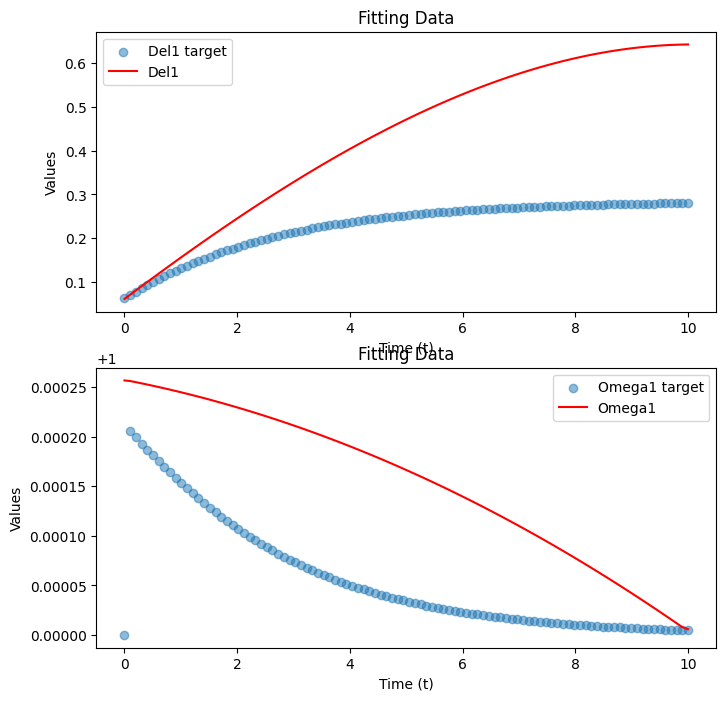

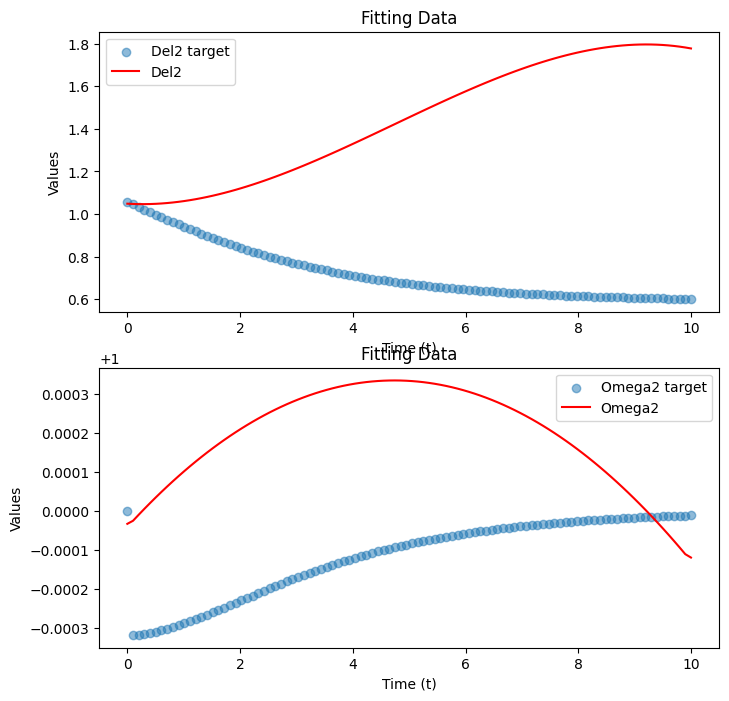

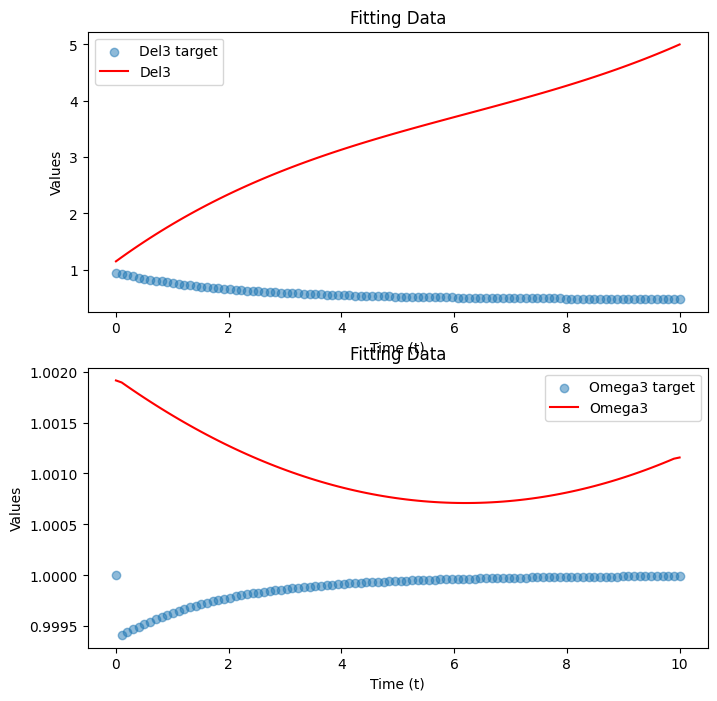

In [14]:
import matplotlib.pyplot as plt


# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delt1_pred = f_classical(a1, b1, c1, d1,t_data)
plt.plot(t_data, delt1_pred, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delt1_prime = np.gradient(delt1_pred, t_data)
fitted_values = (1/Ws)*delt1_prime+1
# fitted_values = (1/Ws)*f_classical_prime(a1,b1,c1,d1,t_data)+1
plt.plot(t_data, fitted_values, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delt2_pred = f_classical(a2, b2, c2, d2,t_data)
plt.plot(t_data, delt2_pred, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delt2_prime = np.gradient(delt2_pred, t_data)
fitted_values = (1/Ws)*delt2_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delt3_pred = f_classical(a3, b3, c3, d3,t_data)
plt.plot(t_data, delt3_pred, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delt3_prime = np.gradient(delt3_pred, t_data)
fitted_values = (1/Ws)*delt3_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')